In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from loader import OUTPUT_DIR, MODEL_ORDER, MODEL_COLORS

df = pd.read_csv(OUTPUT_DIR / "loss_by_turn_progress.csv")
df

model turn_progress_bin  brier_mean  brier_std  log_loss_mean  \
0           naive           0.0-0.1    0.109411   0.000002       0.376929   
1           naive           0.1-0.2    0.109411   0.000002       0.376929   
2           naive           0.2-0.3    0.109411   0.000002       0.376929   
3           naive           0.3-0.4    0.109411   0.000002       0.376929   
4           naive           0.4-0.5    0.109411   0.000002       0.376929   
..            ...               ...         ...        ...            ...   
75  attention_mlp           0.5-0.6    0.079726   0.002594       0.254949   
76  attention_mlp           0.6-0.7    0.072275   0.004518       0.229145   
77  attention_mlp           0.7-0.8    0.062172   0.007674       0.195484   
78  attention_mlp           0.8-0.9    0.048960   0.007267       0.154191   
79  attention_mlp           0.9-1.0    0.038406   0.006621       0.122199   

    log_loss_std  n_samples  
0       0.000009     188312  
1       0.000009     186176  
2       0.000009     187088  
3       0.000009     186632  
4       0.000009     186624  
..           ...        ...  
75      0.007676     188776  
76      0.013604     187360  
77      0.021477     186856  
78      0.019446     187624  
79      0.016821     185400  

[80 rows x 7 columns]

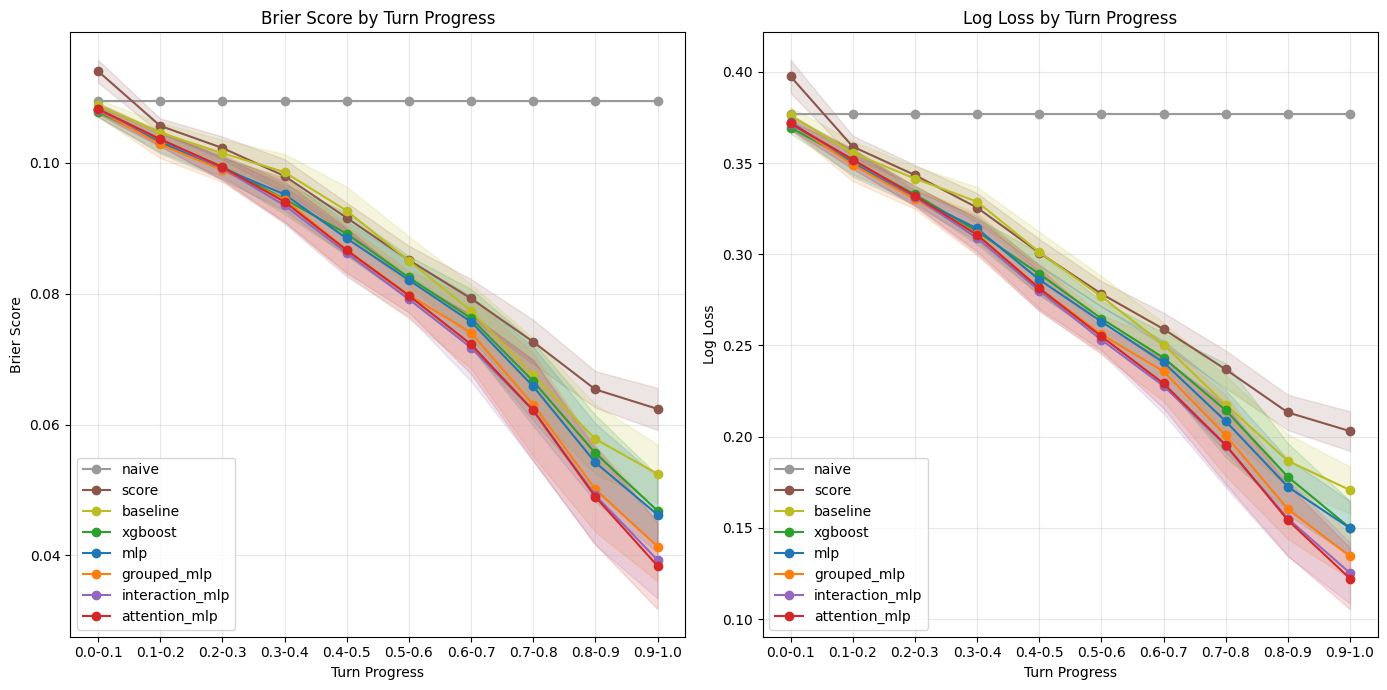

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for name in MODEL_ORDER:
    grp = df[df["model"] == name]
    if grp.empty:
        continue
    color = MODEL_COLORS[name]
    axes[0].plot(grp["turn_progress_bin"], grp["brier_mean"], marker="o", label=name, color=color)
    axes[0].fill_between(
        grp["turn_progress_bin"],
        grp["brier_mean"] - grp["brier_std"],
        grp["brier_mean"] + grp["brier_std"],
        alpha=0.15, color=color,
    )

axes[0].set_xlabel("Turn Progress")
axes[0].set_ylabel("Brier Score")
axes[0].set_title("Brier Score by Turn Progress")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for name in MODEL_ORDER:
    grp = df[df["model"] == name]
    if grp.empty:
        continue
    color = MODEL_COLORS[name]
    axes[1].plot(grp["turn_progress_bin"], grp["log_loss_mean"], marker="o", label=name, color=color)
    axes[1].fill_between(
        grp["turn_progress_bin"],
        grp["log_loss_mean"] - grp["log_loss_std"],
        grp["log_loss_mean"] + grp["log_loss_std"],
        alpha=0.15, color=color,
    )

axes[1].set_xlabel("Turn Progress")
axes[1].set_ylabel("Log Loss")
axes[1].set_title("Log Loss by Turn Progress")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()